#### 1. You were recently hired as a business analyst in a top sports company. 
The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). 
The given data set contains information on all the teams that have so far participated in all the past tournaments. 
It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. 
You are required to do the following:

Before doing any analysis it would be a good idea to check for any hypens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. 


In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
#importing the dataset and checking the first few rows
df = pd.read_csv('Laliga.csv')
df.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [4]:
#checking for any null values
df.isna().sum()

Pos              0
Team             0
Seasons          0
Points           0
GamesPlayed      0
GamesWon         0
GamesDrawn       0
GamesLost        0
GoalsFor         0
GoalsAgainst     0
Champion         0
Runner-up        0
Third            0
Fourth           0
Fifth            0
Sixth            0
T                0
Debut            0
Since/LastApp    0
BestPosition     0
dtype: int64

In [15]:
#checking the last few rows
df.tail()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
56,57,Xerez,1,34,38,8,10,20,38,66,-,-,-,-,-,-,-,2009-10,2009-10,20
57,58,Condal,1,22,30,7,8,15,37,57,-,-,-,-,-,-,-,1956-57,1956-57,16
58,59,Atletico Tetuan,1,19,30,7,5,18,51,85,-,-,-,-,-,-,-,1951-52,1951-52,16
59,60,Cultural Leonesa,1,14,30,5,4,21,34,65,-,-,-,-,-,-,-,1955-56,1955-56,15
60,61,Girona,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2017-18,2017-18,9


In [6]:
#As we can see, there are a lot of '-' symbols present in the data.
#We will replace the '-' with 0 at all places.
#However, we'll ensure that the data present in the Debut and Since/LastApp column is kept intact.

In [16]:
df['Points'] = df['Points'].replace('-',0)
df['GamesPlayed'] = df['GamesPlayed'].replace('-',0)
df['GamesWon'] = df['GamesWon'].replace('-',0)
df['GamesDrawn'] = df['GamesDrawn'].replace('-',0)
df['GamesLost'] = df['GamesLost'].replace('-',0)
df['GoalsFor'] = df['GoalsFor'].replace('-',0)
df['GoalsAgainst'] = df['GoalsAgainst'].replace('-',0)
df['Champion'] = df['Champion'].replace('-',0)
df['Runner-up'] = df['Runner-up'].replace('-',0)
df['Third'] = df['Third'].replace('-',0)
df['Fourth'] = df['Fourth'].replace('-',0)
df['Fifth'] = df['Fifth'].replace('-',0)
df['Sixth'] = df['Sixth'].replace('-',0)
df['T'] = df['T'].replace('-',0)

In [17]:
#let us check the tail again and see if we have got rid of the '-'.

In [18]:
df.tail()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
56,57,Xerez,1,34,38,8,10,20,38,66,0,0,0,0,0,0,0,2009-10,2009-10,20
57,58,Condal,1,22,30,7,8,15,37,57,0,0,0,0,0,0,0,1956-57,1956-57,16
58,59,Atletico Tetuan,1,19,30,7,5,18,51,85,0,0,0,0,0,0,0,1951-52,1951-52,16
59,60,Cultural Leonesa,1,14,30,5,4,21,34,65,0,0,0,0,0,0,0,1955-56,1955-56,15
60,61,Girona,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-18,2017-18,9


In [19]:
#We have sucessfully converted the '-' to 0 at all applicable places.

#### Prepare a short report to answer the following questions:

#### 1. Which are the teams which started playing between 1930-1980?

In [29]:
df[(df['Debut'] > '1930') & (df['Debut'] < '1980')]['Team']

3                Valencia
5                 Sevilla
8                Zaragoza
9              Real Betis
10    Deportivo La Coruna
11             Celta Vigo
12             Valladolid
14         Sporting Gijon
15                Osasuna
16                 Malaga
17                 Oviedo
18               Mallorca
19             Las Palmas
21                Granada
22         Rayo Vallecano
23                  Elche
25               Hercules
26               Tenerife
27                 Murcia
28                 Alaves
29                Levante
30              Salamanca
31               Sabadell
32                  Cadiz
34              Castellon
37                Cordoba
39             Recreativo
40              Burgos CF
41             Pontevedra
46              Gimnastic
49               Alcoyano
50                   Jaen
52             AD Almeria
54                 Lleida
57                 Condal
58        Atletico Tetuan
59       Cultural Leonesa
Name: Team, dtype: object

#### 2. Which are the top 5 teams in terms of points?

In [32]:
df['Points'].head(1)

0    4385
Name: Points, dtype: object

In [33]:
#As we can see, the points table is in the object data type.
#We need to convert this into the integer data type.

In [34]:
df['Points'] = df['Points'].astype('int')
df['Points'].head(1)

0    4385
Name: Points, dtype: int32

In [ ]:
#Now, the table has been converted to int32 dtype.

In [45]:
#using the nlargest method we can find the top 5 teams in terms of points
df.nlargest(5, 'Points')['Team']

0        Real Madrid
1          Barcelona
2    Atletico Madrid
3           Valencia
4    Athletic Bilbao
Name: Team, dtype: object

#### 3.What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? 
(Winning percentage= (GamesWon / GamesPlayed)*100)

In [46]:
df['GamesWon'].head(1)

0    1647
Name: GamesWon, dtype: object

In [47]:
df['GamesPlayed'].head(1)

0    2762
Name: GamesPlayed, dtype: object

In [48]:
#As we can see, the data type of both GamesWon and GamesPlayed columns is object.
#We need to convert this into the integer data type.

In [49]:
df['GamesWon'] = df['GamesWon'].astype('int')
df['GamesWon'].head(1)

0    1647
Name: GamesWon, dtype: int32

In [50]:
df['GamesPlayed'] = df['GamesPlayed'].astype('int')
df['GamesPlayed'].head(1)

0    2762
Name: GamesPlayed, dtype: int32

In [51]:
#Now, we have converted the columns to the integer data type.

In [74]:
df['Win_percent'] = (df['GamesWon']/df['GamesPlayed']) * 100
df.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,Win_percent
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,...,23,8,8,3,4,79,1929,1929,1,59.630702
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,...,25,12,12,4,6,83,1929,1929,1,57.241130
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,...,8,16,9,7,6,56,1929,2002-03,1,47.475134
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,6,10,11,10,7,50,1931-32,1987-88,1,44.557057
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,...,7,10,5,8,10,49,1929,1929,1,43.772629


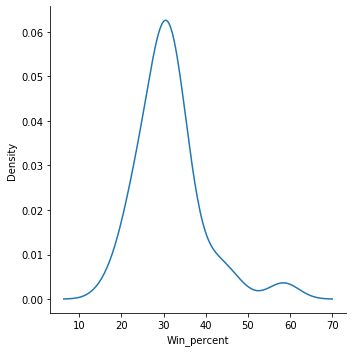

In [69]:
sns.displot(data=df['Win_percent'], kind='kde')
plt.show()

In [61]:
#As we can see the distribution of the winning percentage for all teams is slightly right skewed but can taken to be normal.

In [75]:
#top 5 teams in terms of winning percentage
df.nlargest(5, 'Win_percent')['Team']

0        Real Madrid
1          Barcelona
2    Atletico Madrid
3           Valencia
4    Athletic Bilbao
Name: Team, dtype: object

#### 4. Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [95]:
best_pos_1_3 = df[(df['BestPosition'] >= 1) & (df['BestPosition'] <= 3)]['Win_percent']

In [96]:
best_pos_1_3.count()

18

In [110]:
 best_pos_4_7 = df[(df['BestPosition'] >= 4) & (df['BestPosition'] <= 7)]['Win_percent'][:-2]

In [111]:
best_pos_4_7.count()

18

In [88]:
#let's set up the null and alternate hypothesis to test the claim

In [89]:
#H0 : There is no significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.
#H1 : There is a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [2]:
#let us import the required libraries
from scipy import stats
from scipy.stats import shapiro

In [ ]:
#As the sample sizes are less than 30, we would use the paired two sample t test

In [91]:
#let us check the normality of the data using 90% confidence interval or alpha = 0.1

In [100]:
stat, p = shapiro(best_pos_1_3)
print('p value:', p)

p value: 0.003532945876941085


In [101]:
stat, p = shapiro(best_pos_4_7)
print('p value:', p)

p value: 0.2809881269931793


In [102]:
#As the p val is greater than 0.1 in both cases of the Shapiro test, we can say that the data is normally distributed.

In [112]:
# use 'ttest_rel()' to calculate the t-statistic and corresponding p-value for paired samples
t_stat, p = stats.ttest_rel(best_pos_1_3, best_pos_4_7)
print('P value is:', p)

P value is: 5.170637386910571e-05


In [ ]:
#As the p val is less than 0.1, we reject the H0 and conclude that there is indeed a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

#### 2. A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

In [2]:
n = 200
samp_mean = 140
samp_std = 25

#### a) Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [3]:
#standard error = samp_std / np.sqrt(n)

In [5]:
print('The Standard Error for the sample mean is', np.round(samp_std/np.sqrt(n), 2))

The Standard Error for the sample mean is 1.77


In [ ]:
The standard error indicates the standard deviation of mean within a dataset. 
It basically tells us about the spread of the data in the dataset from the mean.
It indicates how different the population mean could be from the sample mean.

#### b) Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

In [9]:
#we will calculate the confidence interval by using stats.norm.interval.
#since the sample size is 200, we will assume a normal distribution for the data points
print('Confidence interval is', np.round(stats.norm.interval(0.95, loc = samp_mean, scale = samp_std/np.sqrt(n)),2))

Confidence interval is [136.54 143.46]


#### c) Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [10]:
new_n = 100

In [11]:
print('Confidence interval is for n=100 is', np.round(stats.norm.interval(0.95, loc = samp_mean, scale = samp_std/np.sqrt(new_n)),2))

Confidence interval is for n=100 is [135.1 144.9]


#### d) Which of the two above intervals are wider?

In [12]:
#As we can see, the confidence interval with sample size = 100 is wider than the conf interval with sample size as 200.
#This is because increasing the sample size decreases the width of the confidence interval, as the std error decreases.

#### e) Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

In [ ]:
The size (n) of a statistical sample affects the standard error for that sample. 
Because n is in the denominator of the standard error formula, the standard error decreases as n increases. 
It makes sense that having more data gives less variation (and more precision) in the results.

#### 3. Par Inc., is a major manufacturer of golf equipment. 
Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. 
Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. 
The tests with the coating have been promising.
One of the researchers voiced concern about the effect of the new coating on driving distances. 
Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. 
To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. 
The testing was performed with a mechanical hitting machine so that any difference between the mean distances 
for the two models could be attributed to a difference in the design. 
The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.

#### 1. Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.

Par wants to compare the driving distances of the two balls.
Here, we can formulate the hypothesis based on the mean driving distances of both balls.

So, H0 : There is no significant difference between the mean driving distances of the two golf balls.

    H1 : There is a significant difference between the mean driving distances of the two golf balls.
        
Based on the outcome of the hypothesis test, we can conclude that it is a good idea to introduce the new golf ball if there is no significant difference in the mean distances.
Also, if there is a significant difference in the mean distances of the current and proposed new ball, we can conclude not to introduce the new golf ball.

#### 2. Analyze the data to provide the hypothesis testing conclusion. 
What is the p-value for your test? What is your recommendation for Par Inc.?

In [3]:
df_golf = pd.read_csv('Golf.csv')
df_golf.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [4]:
df_golf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Current  40 non-null     int64
 1   New      40 non-null     int64
dtypes: int64(2)
memory usage: 768.0 bytes


In [22]:
#mean of the driving distance of current golf ball
samp_mean_1 = df_golf['Current'].mean()

In [23]:
#mean of the driving distance of new golf ball
samp_mean_2 = df_golf['New'].mean()

In [25]:
samp_std_1 = df_golf['Current'].std()

In [27]:
samp_std_2 = df_golf['New'].std()

In [30]:
n1 = 40
n2 = 40

In [7]:
#We will assume a 95% confidence interval for this test. So, alpha = 0.05

In [9]:
#let us check the normality of data by using Shapiro test

In [17]:
t_stat , p = shapiro(df_golf['Current'])
print('p val for Shapiro test (Current Ball):', p)

p val for Shapiro test (Current Ball): 0.378787100315094


In [16]:
t_stat , p = shapiro(df_golf['New'])
print('p val for Shapiro test (New Ball):', p)

p val for Shapiro test (New Ball): 0.3064655363559723


In [13]:
#As both the p values are greater than 0.05, we can say that the data is normally distributed.

In [ ]:
#Let us check the equality of variances by using Levene's test

In [19]:
t_stat, p = stats.levene(df_golf['Current'], df_golf['New'])
print('p val for Levene\'s test:', p)

p val for Levene's test: 0.6147759523331309


In [ ]:
#As the p val is greater than 0.05, we can say that the population variances are equal.

In [8]:
# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

In [20]:
z_stat, p_val = stests.ztest(x1 = df_golf['Current'], x2 = df_golf['New'], value = 0, alternative = 'two-sided')
print('The p value of the two sample Z test is:', p_val)

The p value of the two sample Z test is: 0.18405868087594723


In [21]:
#As the p value is greater than our alpha(0.05), we would fail to reject the H0.

#### As we have failed to reject the H0, our H0 stays. i.e. There is no significant difference between the mean driving distances of the two golf balls. Based on this conclusion, we can recommend Par Inc., that we are 95% confident that the new cut-resistant ball will offer driving distances comparable to those of the current-model golf ball.

#### 3. What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

In [40]:
print('95% confidence interval for the Current ball population mean is:',
     np.round(stats.norm.interval(0.95, loc = samp_mean_1, scale = samp_std_1/np.sqrt(n1)),2))

95% confidence interval for the Current ball population mean is: [267.56 272.99]


In [41]:
print('95% confidence interval for the New ball population mean is:',
     np.round(stats.norm.interval(0.95, loc = samp_mean_2, scale = samp_std_2/np.sqrt(n2)),2))

95% confidence interval for the New ball population mean is: [264.43 270.57]


In [43]:
print('95% confidence interval for the difference between the means of the 2 populations is',
      np.round(stats.norm.interval(0.95, loc = (samp_mean_1 - samp_mean_2), 
                          scale = np.sqrt(((samp_std_1**2)/n1) + ((samp_std_2**2)/n2))),2))

95% confidence interval for the difference between the means of the 2 populations is [-1.32  6.87]
